## Principal Component Analysis

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

##### Principal Component Analysis
Principal Component Analysis is a process of feature extraction for reducing the number of dimensions for efficient visualisation as well as for selecting the important features.

##### Intuition
The basic intuition is that, we select the two important features in the data and then we plot them by transforming them into their axis with respect to their eigen vectors, so they can be visualised easily.

<img src='https://liorpachter.files.wordpress.com/2014/05/pca_figure1.jpg' style='margin:0px;' width=400>

##### Method
- Standardize the data.
- Obtain the eigen vectors or the eigen values of the data features.
> This is typically done by, 
>    
    1. Finding the centroid of the data points.
    2. Moving the data points to the origin.
    3. Fitting a straight line passing throught the data points. The number of lines that need to be fit depends upon the (number of dimensions - 1).
    4. Complete the last axis by making it perpendicular to the other dimensions.
    5. Find the eigen values of the different features.
    
- Sort the eigen values in descending order.
- Transform the data points in the desired number of features selected.

<a id='preprocessing'></a>
### Pre processing

In [4]:
## importing the libraries for simple linear regression.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


The objective of this exercise is to predict the wine into how the consumers will like with the help of their chemical composition. But there is a problem that we cannot visualise the results as there are a lot of dimensions. We will apply pca to solve the problem.

In [3]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Normalising the vectors.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id='building'></a>
### Building the model.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

##### Applying PCA
First we need to understand the variance of the different dimensions in determining our result. So for that we will consider all the components and then select the most relevant ones.

In [20]:
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

We can see that the first two variables contribute to more than 50% of the variance. And the other variables only contribute to little variance. So we can select these two variables and do the classification.

In [21]:
# Applying PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [22]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

<a id='result'></a>
### Result

In [33]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

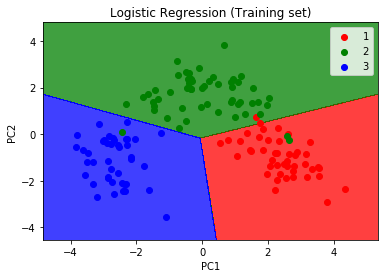

In [34]:
plot_regions(X_train, y_train, 'Classifier (Training set)')

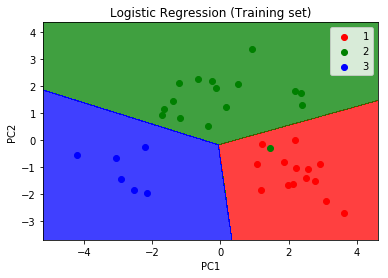

In [35]:
plot_regions(X_test, y_test, 'Classifier (Test set)')

##### Conclusion
We can see that PCA was very effective in extracting the most important features for classifying. And also, by using this method we were able to visualise the results very well.